<a href="https://colab.research.google.com/github/Jdasanja/masters_thesis_final/blob/main/ML_Algo_4_bin_classification_va_longbeach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# import pandas for reading and displaying local file
import pandas as pd

In [ ]:

# Load the dataset from the raw GitHub URL
url = 'https://raw.githubusercontent.com/Jdasanja/masers_thesis/main/processed.va.data'
df = pd.read_csv(url, header=None)

# Add column names (based on standard attribute names for the Cleveland dataset)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'num']

# Add a unique identifier column
df['patient_id'] = range(1, len(df) + 1)

# Set 'patient_id' as the index
df.set_index('patient_id', inplace=True)


# Display first few rows of the uploaded file with headers
print("First few rows of the uploaded file with column headers:")
print(df.head())

First few rows of the uploaded file with column headers:
            age  sex  cp trestbps chol fbs  restecg thalach exang oldpeak  \
patient_id                                                                  
1            63    1   4      140  260   0        1     112     1       3   
2            44    1   4      130  209   0        1     127     0       0   
3            60    1   4      132  218   0        1     140     1     1.5   
4            55    1   4      142  228   0        1     149     1     2.5   
5            66    1   3      110  213   1        2      99     1     1.3   

           slope ca thal  num  
patient_id                     
1              2  ?    ?    2  
2              ?  ?    ?    0  
3              3  ?    ?    2  
4              1  ?    ?    1  
5              2  ?    ?    0  


In [ ]:
df.shape

(200, 14)

In [ ]:
counts = df.groupby('sex').size()
print(counts)


sex
0      6
1    194
dtype: int64


In [ ]:
# Create a new dataframe with a new binary column based on the values in 'num'
df_binary_col = df.copy()
df_binary_col['num_binary'] = df_binary_col['num'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)

df_binary_col = df_binary_col.drop('num', axis=1)

<ipython-input-4-5b5a37fadb9b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num_binary', data=df_binary_col, palette='viridis')


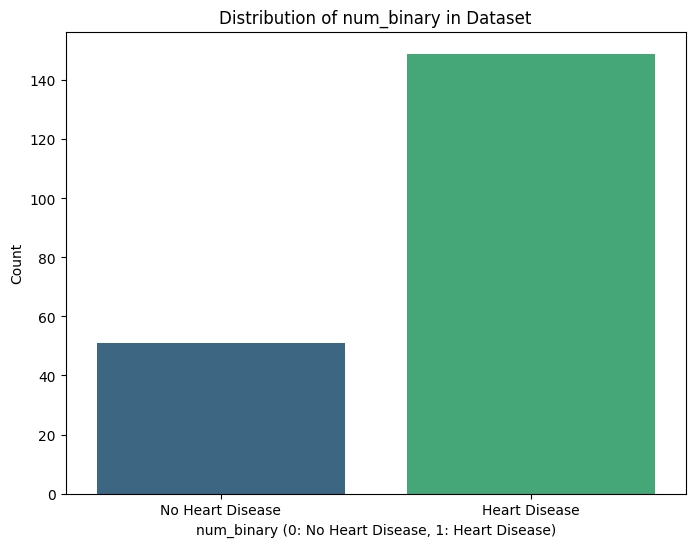

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the binary target attribute 'num_binary'
plt.figure(figsize=(8, 6))
sns.countplot(x='num_binary', data=df_binary_col, palette='viridis')
plt.title('Distribution of num_binary in Dataset')
plt.xlabel('num_binary (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

<ipython-input-43-00ababd6b3ae>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df_binary_col, palette='viridis')


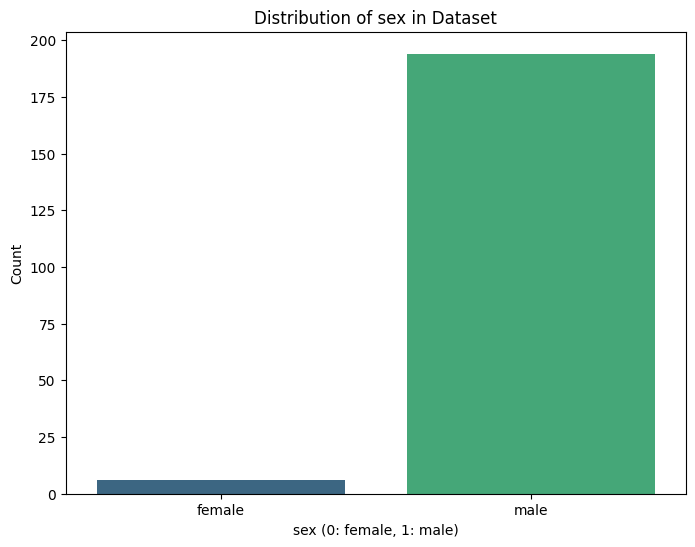

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the binary target attribute 'num_binary'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df_binary_col, palette='viridis')
plt.title('Distribution of sex in Dataset')
plt.xlabel('sex (0: female, 1: male)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['female', 'male'])
plt.show()

In [ ]:
import numpy as np

## Replace question marks with NaN
df_binary_col.replace('?', np.nan, inplace=True)

## Total count of missing values
df_binary_col.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,56
chol,7
fbs,7
restecg,0
thalach,53
exang,53
oldpeak,56


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df_binary_col.drop(columns=['num_binary'])

# Separate the target
y = df_binary_col['num_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Merge X_train and y_train into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Rename the target column (y_train) if necessary for clarity
train_data.rename(columns={'num_binary': 'HeartDiseaseSeverity'}, inplace=True)

In [ ]:
## Total count of missing values
train_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,47
chol,4
fbs,5
restecg,0
thalach,44
exang,44
oldpeak,46


In [ ]:
##Percentage of the column with missing values
train_data.isnull().sum()/len(train_data)*100

,0
age,0.000
sex,0.000
cp,0.000
trestbps,29.375
chol,2.500
fbs,3.125
restecg,0.000
thalach,27.500
exang,27.500
oldpeak,28.750


In [ ]:
##Percentage of the column with missing values
df_binary_col.isnull().sum()/len(df_binary_col)*100

,0
age,0.0
sex,0.0
cp,0.0
trestbps,28.0
chol,3.5
fbs,3.5
restecg,0.0
thalach,26.5
exang,26.5
oldpeak,28.0


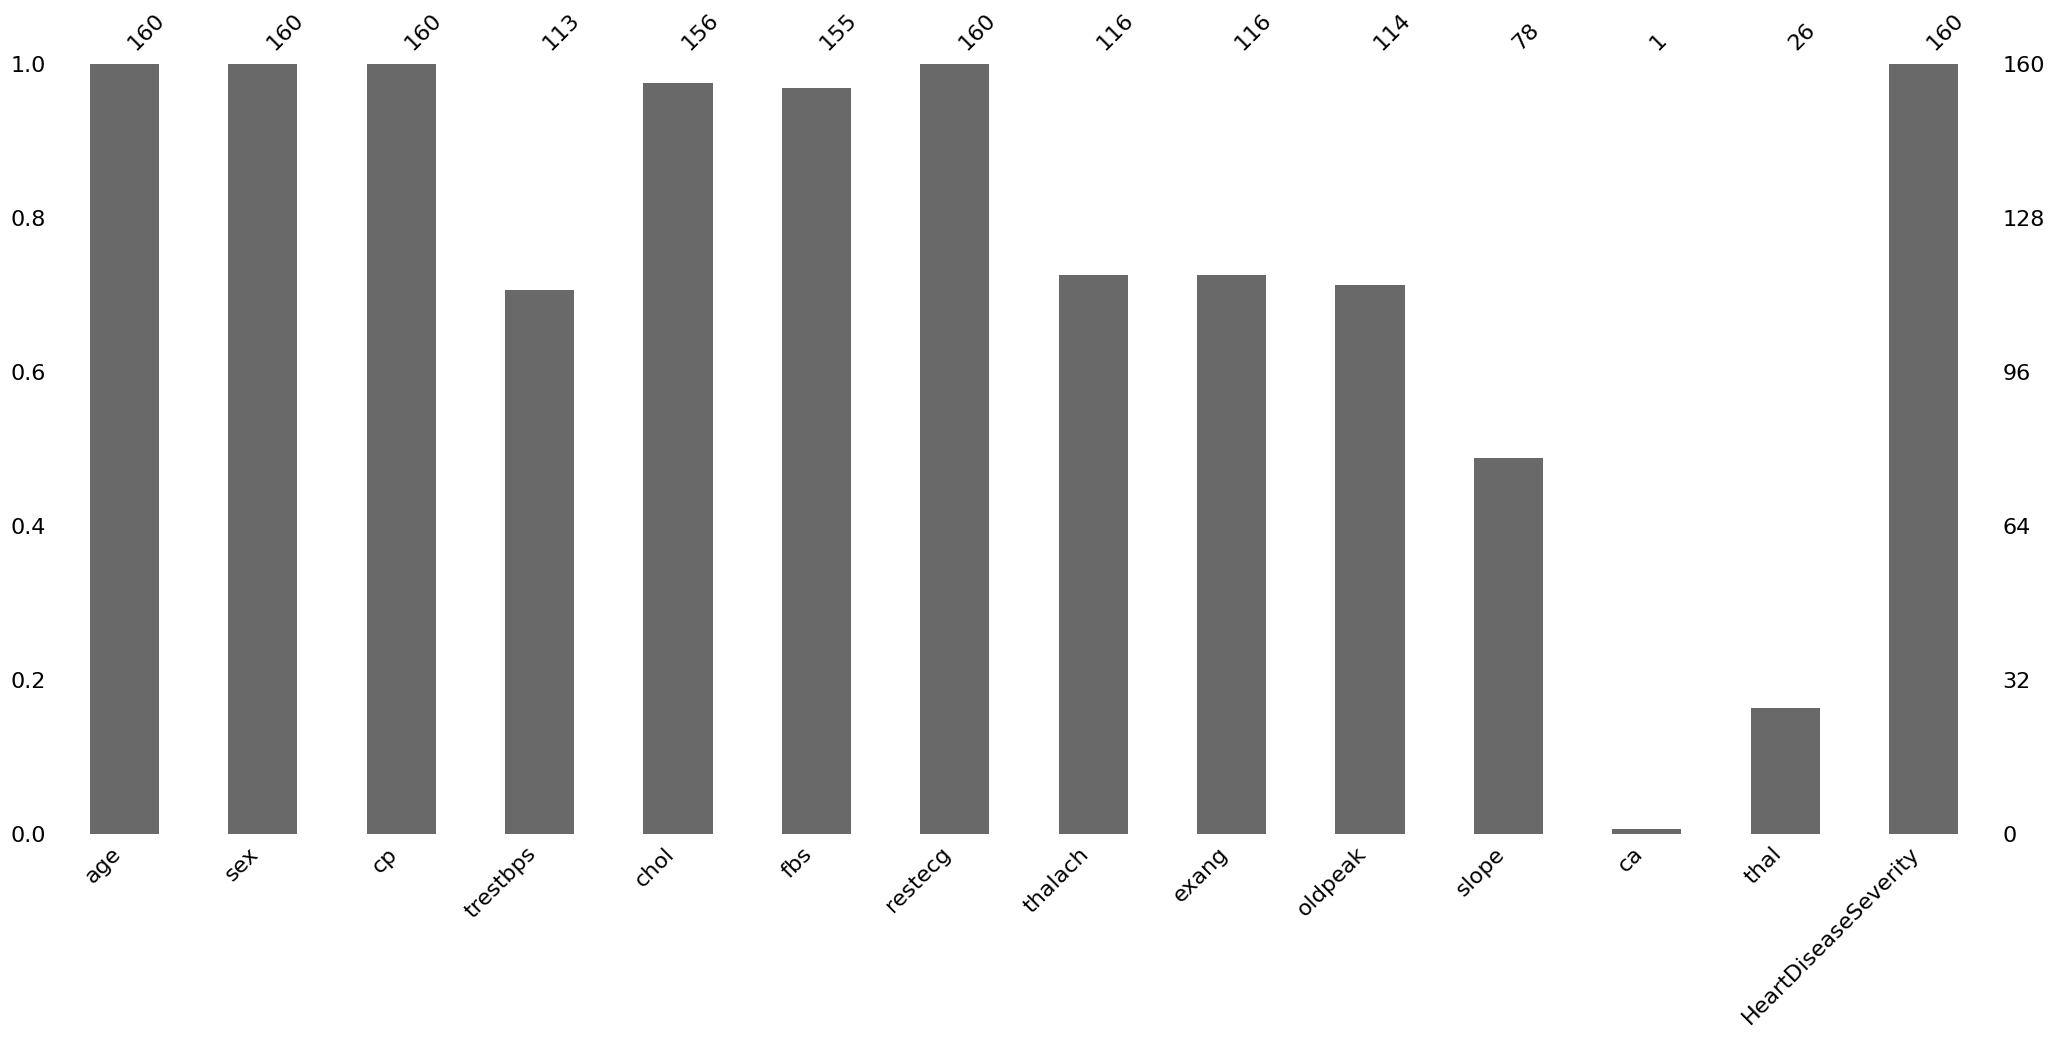

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(train_data)
plt.show()

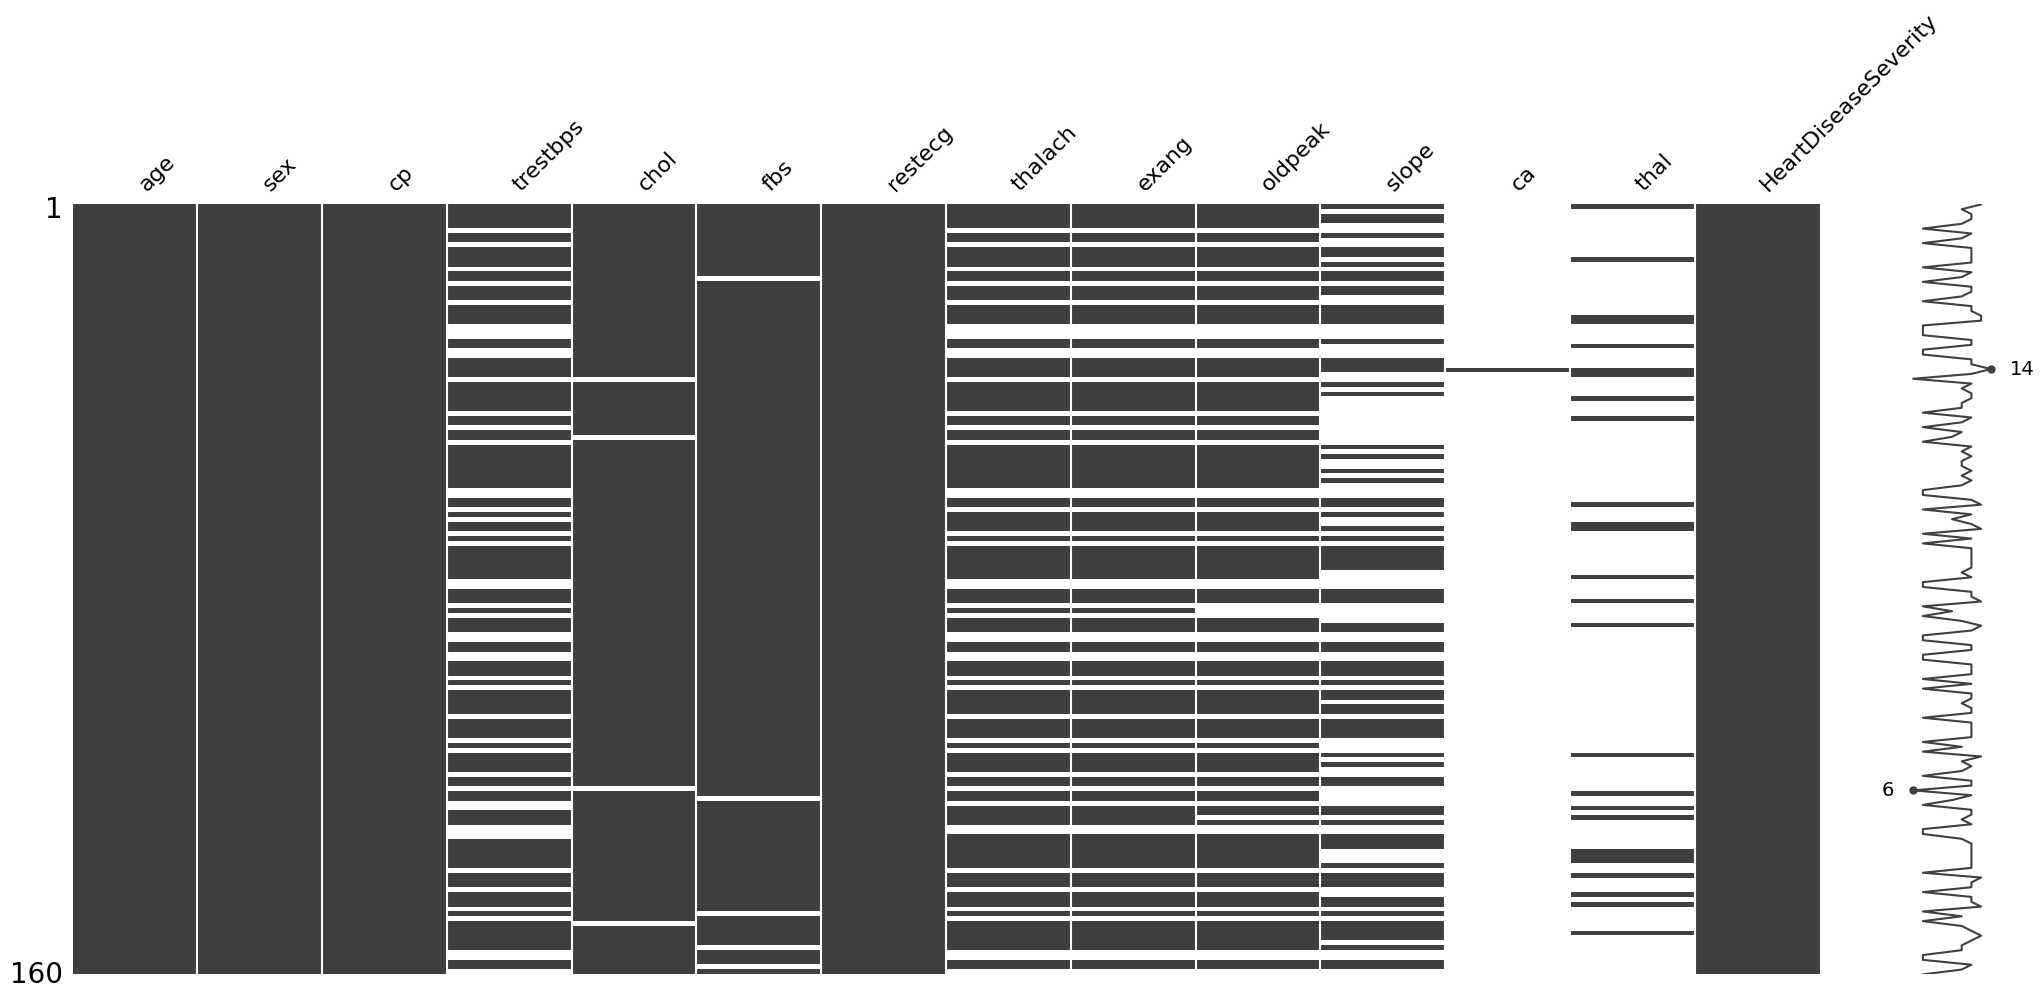

In [ ]:
msno.matrix(train_data)
plt.show()

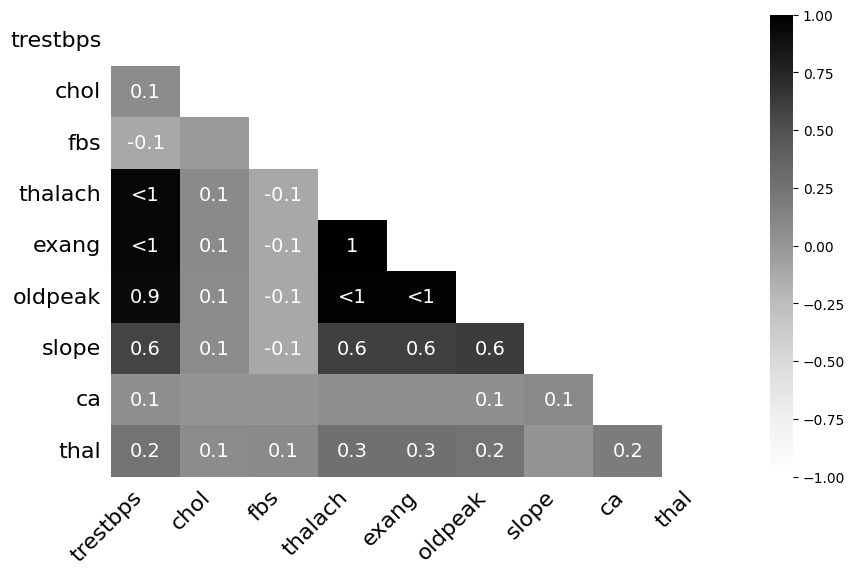

In [ ]:
#visualize the relative missingness of columns?
msno.heatmap(train_data, cmap='Greys', figsize=(10, 6))  # Using a grayscale colormap for darker gradient
plt.show()

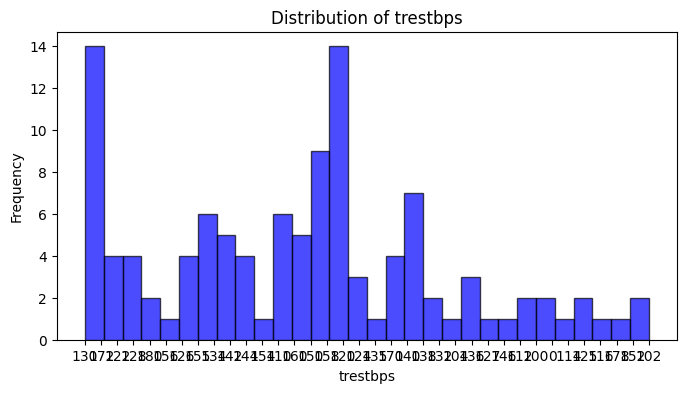

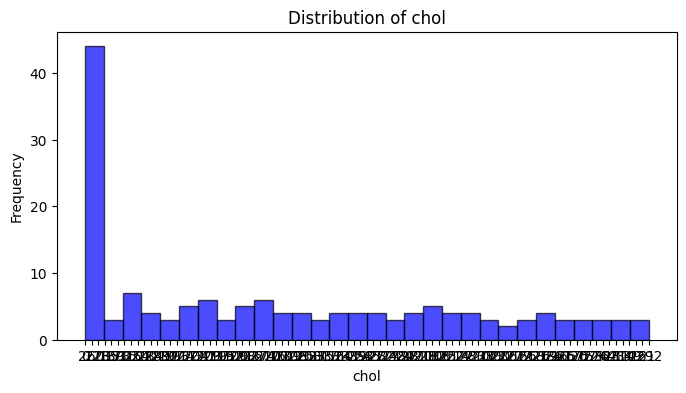

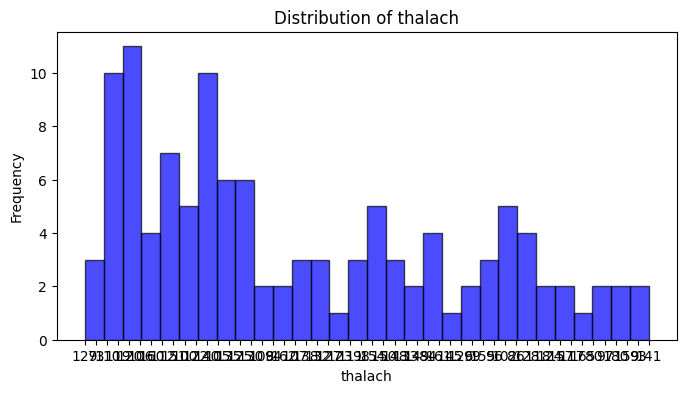

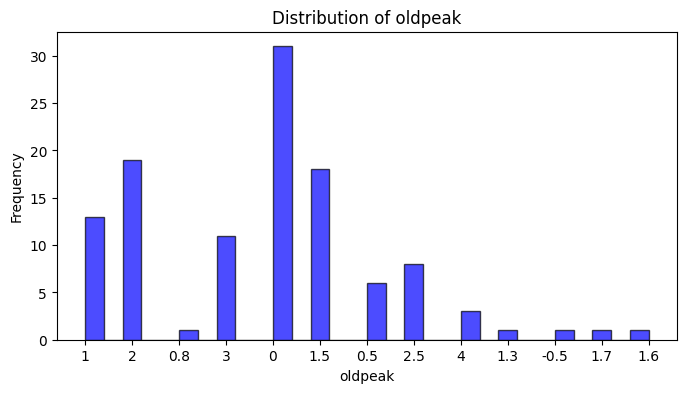

In [ ]:
import matplotlib.pyplot as plt

# List of numerical columns to plot
numerical_columns = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Plot histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(train_data[col].dropna(), bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

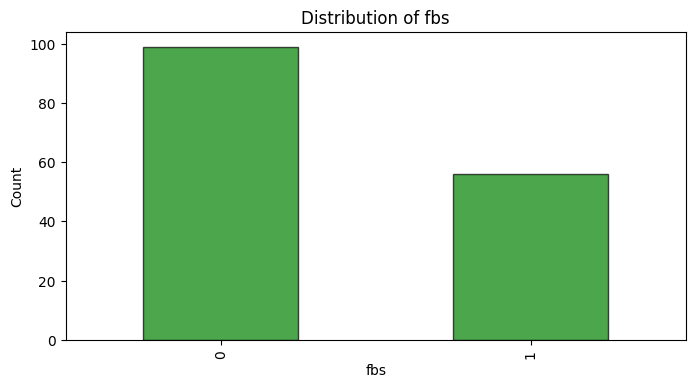

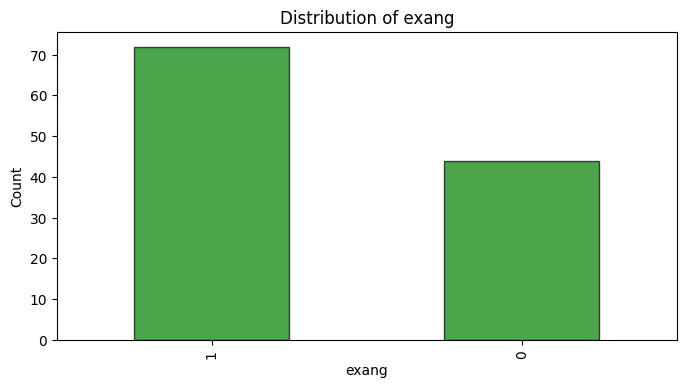

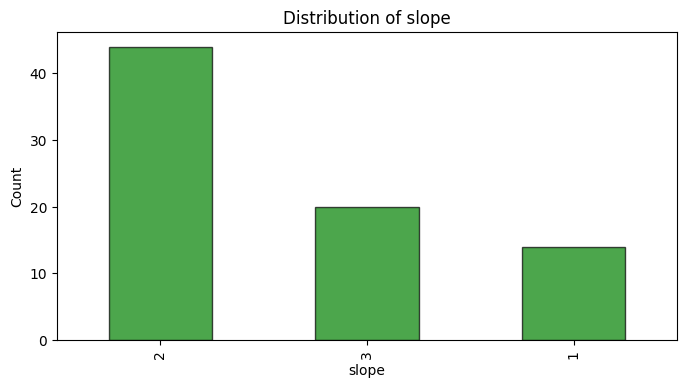

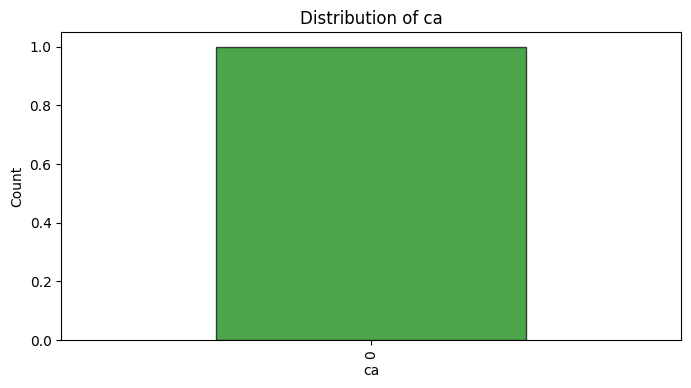

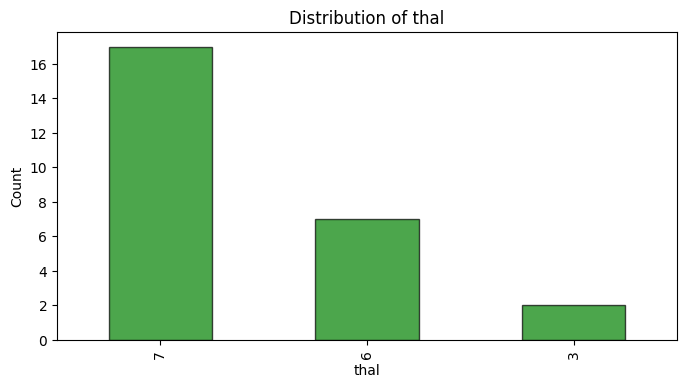

In [ ]:
categorical_columns = ['fbs', 'exang', 'slope', 'ca', 'thal']

# Plot bar plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    train_data[col].value_counts().plot(kind='bar', color='green', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [ ]:
from sklearn.impute import SimpleImputer

# Drop columns with very high missing values ('ca' and 'thal' based on visualizations)
X_train = X_train.drop(columns=['ca', 'thal'])
X_test = X_test.drop(columns=['ca', 'thal'])

# Handling missing values using imputation strategies
# Mean imputation for specific numerical columns (normally distributed columns)
mean_imputer = SimpleImputer(strategy='mean')
mean_cols = ['trestbps', 'thalach']  # Normally distributed columns based on visualizations
X_train[mean_cols] = mean_imputer.fit_transform(X_train[mean_cols])
X_test[mean_cols] = mean_imputer.transform(X_test[mean_cols])

# Median imputation for skewed numerical columns
median_imputer = SimpleImputer(strategy='median')
median_cols = ['chol', 'oldpeak']  # Skewed columns based on visualizations
X_train[median_cols] = median_imputer.fit_transform(X_train[median_cols])
X_test[median_cols] = median_imputer.transform(X_test[median_cols])

# Mode imputation for categorical or binary columns (including 'fbs')
mode_imputer = SimpleImputer(strategy='most_frequent')
mode_cols = ['fbs', 'exang', 'slope']  # Added 'fbs' to mode imputation
X_train[mode_cols] = mode_imputer.fit_transform(X_train[mode_cols])
X_test[mode_cols] = mode_imputer.transform(X_test[mode_cols])

# Handling outliers using the IQR method
def handle_outliers_with_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Define continuous columns for outlier handling
continuous_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Apply outlier handling to training data
for col in continuous_cols:
    handle_outliers_with_IQR(X_train, col)

# Apply outlier handling to testing data
for col in continuous_cols:
    handle_outliers_with_IQR(X_test, col)

# Drop any remaining rows with missing values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Align y_train with X_train

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]  # Align y_test with X_test

# Verify no missing values are present
print("Missing values in X_train after all modifications:")
print(X_train.isnull().sum())
print("Missing values in X_test after all modifications:")
print(X_test.isnull().sum())

# Verify outliers are clipped
print("After outlier handling - training data:")
print(X_train[continuous_cols].describe())
print("After outlier handling - testing data:")
print(X_test[continuous_cols].describe())


Missing values in X_train after all modifications:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
dtype: int64
Missing values in X_test after all modifications:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
dtype: int64
After outlier handling - training data:
         trestbps        chol     thalach     oldpeak
count  160.000000  160.000000  160.000000  160.000000
mean   134.057301  177.362500  123.429203    1.365000
std     13.427066  109.159366   17.748411    0.904788
min    105.000000    0.000000   84.250000   -0.500000
25%    126.000000  129.250000  112.000000    1.000000
50%    133.982301  213.000000  123.594828    1.500000
75%    140.000000  255.000000  130.500000    2.000000
max    161.000000  349.000000  158.250000    3.500000
After outlier handling - testing data:


In [ ]:
from collections import Counter

# Analyze class distribution
print("Class distribution before upsampling:", Counter(y_train))


Class distribution before upsampling: Counter({1: 119, 0: 41})


<h1> Transformation Test 1 </h1>

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy

# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'cp', 'restecg', 'exang', 'oldpeak', 'slope'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformedtest = ct.fit_transform(X_train)
X_test_transformedtest = ct.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model: 0.75
F1 Score of the model: 0.6428571428571428
Precision: 1.0
Recall: 0.75


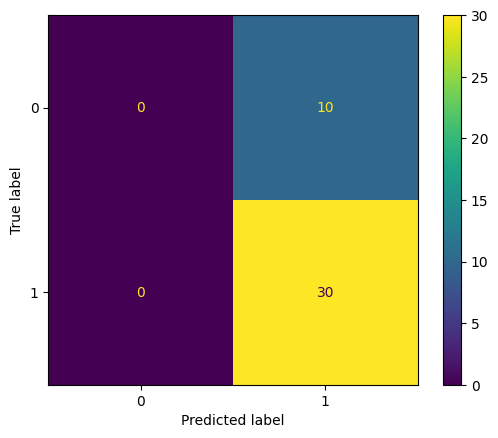

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.75      1.00      0.86        30

    accuracy                           0.75        40
   macro avg       0.38      0.50      0.43        40
weighted avg       0.56      0.75      0.64        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=123, max_depth=2)

# Training the model on the training dataset
clf.fit(X_train_transformedtest, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformedtest)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=123, max_depth=2)
clf_model = clf.fit(X_train_transformedtest, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_test}')
print(f'Mean Accuracy: {cross_val_results_test.mean()}')
# Custom scoring functions
precision_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test}')
print(f'Mean Precision: {precision_test.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test}')
print(f'Mean Recall: {recall_test.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test}')
print(f'Mean F1 Score: {f1_test.mean()}')

Cross-Validation Results (Accuracy): [0.375 1.    0.875 0.625 0.875]
Mean Accuracy: 0.75
Cross-Validation Results (Precision): [0.375 1.    0.875 0.625 0.875]
Mean Precision: 0.75
Cross-Validation Results (Recall): [1. 1. 1. 1. 1.]
Mean Recall: 1.0
Cross-Validation Results (F1 Score): [0.54545455 1.         0.93333333 0.76923077 0.93333333]
Mean F1 Score: 0.8362703962703962


In [ ]:
# Import the necessary library
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42, colsample_bytree=1.0, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.8)

# Train the model
xgb_classifier.fit(X_train_transformedtest, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformedtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.83      0.97      0.89        30

    accuracy                           0.82        40
   macro avg       0.81      0.68      0.71        40
weighted avg       0.82      0.82      0.80        40



In [ ]:
#pip install scikit-learn==1.0.2

In [ ]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
# Import necessary libraries

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, classification_report, accuracy_score
# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBClassifier with sklearn compatibility
xgb_classifier = XGBClassifier(
    random_state=42,
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=2,
    n_estimators=50,
    subsample=0.8
  # Suppress eval_metric deprecation warnings
)

# Perform cross-validation
cross_val_accuracy = cross_val_score(xgb_classifier, X_train_transformedtest, y_train, cv=kf, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cross_val_accuracy}")
print(f"Mean Accuracy: {cross_val_accuracy.mean()}")

# Perform cross-validation for precision, recall, and F1-score
precision_scorer = make_scorer(precision_score, average='binary', zero_division=1)  # Handle zero division
recall_scorer = make_scorer(recall_score, average='binary', zero_division=1)  # Handle zero division
f1_scorer = make_scorer(f1_score, average='binary', zero_division=1)  # Handle zero division

cross_val_precision = cross_val_score(xgb_classifier, X_train_transformedtest, y_train, cv=kf, scoring=precision_scorer)
cross_val_recall = cross_val_score(xgb_classifier, X_train_transformedtest, y_train, cv=kf, scoring=recall_scorer)
cross_val_f1 = cross_val_score(xgb_classifier, X_train_transformedtest, y_train, cv=kf, scoring=f1_scorer)

# Print the results
print(f"Cross-Validation Accuracy: {cross_val_accuracy}")
print(f"Mean Accuracy: {cross_val_accuracy.mean()}")

print(f"Cross-Validation Precision: {cross_val_precision}")
print(f"Mean Precision: {cross_val_precision.mean()}")

print(f"Cross-Validation Recall: {cross_val_recall}")
print(f"Mean Recall: {cross_val_recall.mean()}")

print(f"Cross-Validation F1 Score: {cross_val_f1}")
print(f"Mean F1 Score: {cross_val_f1.mean()}")

Cross-Validation Accuracy: [0.6875  0.65625 0.65625 0.6875  0.8125 ]
Mean Accuracy: 0.7
Cross-Validation Accuracy: [0.6875  0.65625 0.65625 0.6875  0.8125 ]
Mean Accuracy: 0.7
Cross-Validation Precision: [0.73333333 0.67741935 0.71428571 0.73333333 0.8125    ]
Mean Precision: 0.7341743471582182
Cross-Validation Recall: [0.91666667 0.95454545 0.86956522 0.91666667 1.        ]
Mean Recall: 0.9314888010540183
Cross-Validation F1 Score: [0.81481481 0.79245283 0.78431373 0.81481481 0.89655172]
Mean F1 Score: 0.8205895818892872


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Random Forest
#rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=50, random_state=123,max_depth=2)
# XGBoost
xgb_clf = XGBClassifier(
random_state=42, colsample_bytree=1.0, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.8
)

# Logistic Regression
lr_clf = LogisticRegression(
    random_state=42,
    max_iter=10000,
    solver='saga',
    penalty='l2'
)

# ==========================
# Define Ensemble Model
# ==========================

ensemble_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('lr', lr_clf)
    ],
    voting='soft'  # Soft voting for probability-based decisions
)

In [ ]:
# Fit the ensemble model with data
ensemble_clf.fit(X_train_transformedtest, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformedtest)

# ==========================
# Evaluate the Model
# ==========================

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ensemble)

# F1 Score
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')

# Precision
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)

# Recall
recall = recall_score(y_test, y_pred_ensemble, average='weighted')

# Classification Report
report = classification_report(y_test, y_pred_ensemble)

# Output Results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nClassification Report:")
print(report)

Accuracy: 0.75
F1 Score: 0.6428571428571428
Precision: 0.5625
Recall: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.75      1.00      0.86        30

    accuracy                           0.75        40
   macro avg       0.38      0.50      0.43        40
weighted avg       0.56      0.75      0.64        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform Cross-Validation
cv_results = cross_validate(
    ensemble_clf,
    X_test_transformedtest,
    y_test,
    cv=kf,
    scoring=scoring,
    return_train_score=False
)

# Output Cross-Validation Results
print("Cross-Validation Results:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.4f}")

# Fit the model on the full training set
ensemble_clf.fit(X_train_transformedtest, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformedtest)

# Evaluate on Test Set
accuracy = accuracy_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_ensemble, average='weighted')
report = classification_report(y_test, y_pred_ensemble)

# Output Test Set Results
print("\nTest Set Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(report)

Cross-Validation Results:
Mean Accuracy: 0.7500
Mean Precision: 0.6125
Mean Recall: 0.7500
Mean F1 Score: 0.6637

Test Set Results:
Accuracy: 0.7500
F1 Score: 0.6429
Precision: 0.5625
Recall: 0.7500

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.75      1.00      0.86        30

    accuracy                           0.75        40
   macro avg       0.38      0.50      0.43        40
weighted avg       0.56      0.75      0.64        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1> Transformation 2 </h1>

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy

# Custom Transformer for Combining 'oldpeak' and 'slope'
class CombineOldpeakSlope(BaseEstimator, TransformerMixin):
    def __init__(self, method='add'):  # Choose method: 'add', 'multiply', 'weighted'
        self.method = method

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
                # Convert 'oldpeak' and 'slope' to numeric before applying the method
        X_copy['oldpeak'] = pd.to_numeric(X_copy['oldpeak'], errors='coerce')
        X_copy['slope'] = pd.to_numeric(X_copy['slope'], errors='coerce')

        if self.method == 'add':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] + X_copy['slope']
        elif self.method == 'multiply':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] * X_copy['slope']
        elif self.method == 'weighted':
            X_copy['oldpeak_slope_combined'] = 0.6 * X_copy['oldpeak'] + 0.4 * X_copy['slope']
        return X_copy.drop(columns=['oldpeak', 'slope'])

# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']
combine_columns = ['oldpeak', 'slope']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("combine_oldpeak_slope", CombineOldpeakSlope(method='add'), combine_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'fbs', 'restecg', 'exang']),
        ("onehot", OneHotEncoder(sparse=False), ['cp'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

Accuracy of the model: 0.825
F1 Score of the model: 0.8025641025641026
Precision: 0.8958333333333334
Recall: 0.825


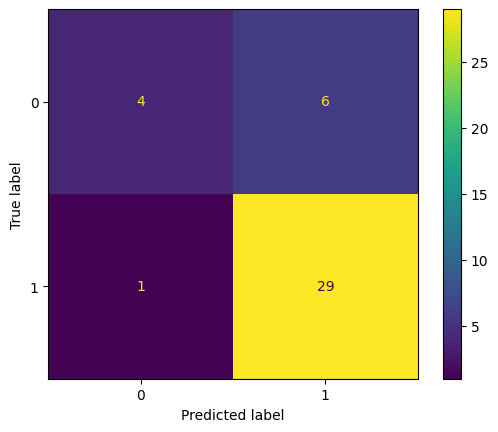

              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.83      0.97      0.89        30

    accuracy                           0.82        40
   macro avg       0.81      0.68      0.71        40
weighted avg       0.82      0.82      0.80        40



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)
clf_model = clf.fit(X_train_transformed, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_test}')
print(f'Mean Accuracy: {cross_val_results_test.mean()}')
# Custom scoring functions
precision_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test}')
print(f'Mean Precision: {precision_test.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test}')
print(f'Mean Recall: {recall_test.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test}')
print(f'Mean F1 Score: {f1_test.mean()}')

Cross-Validation Results (Accuracy): [0.375 1.    0.875 0.75  0.75 ]
Mean Accuracy: 0.75
Cross-Validation Results (Precision): [0.375      1.         0.875      0.71428571 0.85714286]
Mean Precision: 0.7642857142857143
Cross-Validation Results (Recall): [1.         1.         1.         1.         0.85714286]
Mean Recall: 0.9714285714285713
Cross-Validation Results (F1 Score): [0.54545455 1.         0.93333333 0.83333333 0.85714286]
Mean F1 Score: 0.8338528138528136


<h1>With Optimized parameters from original model</h1>

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model: 0.75
F1 Score of the model: 0.6428571428571428
Precision: 1.0
Recall: 0.75


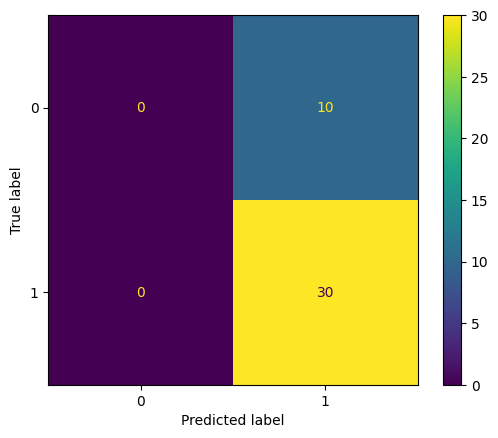

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.75      1.00      0.86        30

    accuracy                           0.75        40
   macro avg       0.38      0.50      0.43        40
weighted avg       0.56      0.75      0.64        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=2)

# Training the model on the training dataset
clf.fit(X_train_transformedtest, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformedtest)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=2)
clf_model = clf.fit(X_train_transformedtest, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_test}')
print(f'Mean Accuracy: {cross_val_results_test.mean()}')
# Custom scoring functions
precision_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test}')
print(f'Mean Precision: {precision_test.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test}')
print(f'Mean Recall: {recall_test.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test}')
print(f'Mean F1 Score: {f1_test.mean()}')

Cross-Validation Results (Accuracy): [0.375 1.    0.875 0.625 0.875]
Mean Accuracy: 0.75
Cross-Validation Results (Precision): [0.375 1.    0.875 0.625 0.875]
Mean Precision: 0.75
Cross-Validation Results (Recall): [1. 1. 1. 1. 1.]
Mean Recall: 1.0
Cross-Validation Results (F1 Score): [0.54545455 1.         0.93333333 0.76923077 0.93333333]
Mean F1 Score: 0.8362703962703962


<h1> Ensemble Method for transformation 2</h1>

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Random Forest
#rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)
# XGBoost
xgb_clf = XGBClassifier(
random_state=42, colsample_bytree=1.0, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.8
)

# Logistic Regression
lr_clf = LogisticRegression(
    random_state=42,
    max_iter=10000,
    solver='saga',
    penalty='l2'
)

# ==========================
# Define Ensemble Model
# ==========================

ensemble_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('lr', lr_clf)
    ],
    voting='soft'  # Soft voting for probability-based decisions
)

In [ ]:
# Fit the ensemble model with data
ensemble_clf.fit(X_train_transformedtest, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformedtest)

# ==========================
# Evaluate the Model
# ==========================

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ensemble)

# F1 Score
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')

# Precision
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)

# Recall
recall = recall_score(y_test, y_pred_ensemble, average='weighted')

# Classification Report
report = classification_report(y_test, y_pred_ensemble)

# Output Results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nClassification Report:")
print(report)

Accuracy: 0.825
F1 Score: 0.7870264064293915
Precision: 0.8581081081081081
Recall: 0.825

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.81      1.00      0.90        30

    accuracy                           0.82        40
   macro avg       0.91      0.65      0.68        40
weighted avg       0.86      0.82      0.79        40



In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform Cross-Validation
cv_results = cross_validate(
    ensemble_clf,
    X_test_transformedtest,
    y_test,
    cv=kf,
    scoring=scoring,
    return_train_score=False
)

# Output Cross-Validation Results
print("Cross-Validation Results:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.4f}")

# Fit the model on the full training set
ensemble_clf.fit(X_train_transformedtest, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformedtest)

# Evaluate on Test Set
accuracy = accuracy_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_ensemble, average='weighted')
report = classification_report(y_test, y_pred_ensemble)

# Output Test Set Results
print("\nTest Set Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(report)

Cross-Validation Results:
Mean Accuracy: 0.7500
Mean Precision: 0.6125
Mean Recall: 0.7500
Mean F1 Score: 0.6637

Test Set Results:
Accuracy: 0.8250
F1 Score: 0.7870
Precision: 0.8581
Recall: 0.8250

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.81      1.00      0.90        30

    accuracy                           0.82        40
   macro avg       0.91      0.65      0.68        40
weighted avg       0.86      0.82      0.79        40



<h1>With Optimized parameters from original model</h1>

In [ ]:
# Random Forest
#rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=2)
# XGBoost
xgb_clf = XGBClassifier(
random_state=42, colsample_bytree=1.0, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.8
)

# Logistic Regression
lr_clf = LogisticRegression(
    random_state=42,
    max_iter=10000,
    solver='saga',
    penalty='l2'
)

# ==========================
# Define Ensemble Model
# ==========================

ensemble_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('lr', lr_clf)
    ],
    voting='soft'  # Soft voting for probability-based decisions
)

In [ ]:
# Fit the ensemble model with data
ensemble_clf.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformed)

# ==========================
# Evaluate the Model
# ==========================

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ensemble)

# F1 Score
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')

# Precision
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)

# Recall
recall = recall_score(y_test, y_pred_ensemble, average='weighted')

# Classification Report
report = classification_report(y_test, y_pred_ensemble)

# Output Results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:")
print(report)

Accuracy: 0.75
Precision: 0.5625
Recall: 0.75
F1 Score: 0.6428571428571428

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.75      1.00      0.86        30

    accuracy                           0.75        40
   macro avg       0.38      0.50      0.43        40
weighted avg       0.56      0.75      0.64        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform Cross-Validation
cv_results = cross_validate(
    ensemble_clf,
    X_test_transformed,
    y_test,
    cv=kf,
    scoring=scoring,
    return_train_score=False
)

# Output Cross-Validation Results
print("Cross-Validation Results:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.4f}")

# Fit the model on the full training set
ensemble_clf.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformed)

# Evaluate on Test Set
accuracy = accuracy_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_ensemble, average='weighted')
report = classification_report(y_test, y_pred_ensemble)

# Output Test Set Results
print("\nTest Set Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(report)

Cross-Validation Results:
Mean Accuracy: 0.7500
Mean Precision: 0.6125
Mean Recall: 0.7500
Mean F1 Score: 0.6637

Test Set Results:
Accuracy: 0.7500
F1 Score: 0.6429
Precision: 0.5625
Recall: 0.7500

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.75      1.00      0.86        30

    accuracy                           0.75        40
   macro avg       0.38      0.50      0.43        40
weighted avg       0.56      0.75      0.64        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Male vs. Female test

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df_binary_col.drop(columns=['num_binary'])

# Separate the target
y = df_binary_col['num_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Filter using the original X_test DataFrame to get indices for males and females
male_indices = X_test['sex'] == 1
female_indices = X_test['sex'] == 0

# Use these indices to split the transformed data and y_test
X_test_male = X_test[male_indices]
y_test_male = y_test[male_indices]

X_test_female = X_test[female_indices]
y_test_female = y_test[female_indices]

# Verify the splits
print("Male Test Set Shape (X):", X_test_male.shape)
print("Male Test Set Shape (y):", y_test_male.shape)
print("Female Test Set Shape (X):", X_test_female.shape)
print("Female Test Set Shape (y):", y_test_female.shape)

Male Test Set Shape (X): (39, 13)
Male Test Set Shape (y): (39,)
Female Test Set Shape (X): (1, 13)
Female Test Set Shape (y): (1,)
